In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\happy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\happy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\happy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [9]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\happy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [10]:
pip install tensorflow


  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
Using legacy 'setup.py install' for termcolor, since package 'wheel' is not installed.
    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\happy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\happy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [12]:
pip install scikit-learn

You should consider upgrading via the 'c:\users\happy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [14]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\happy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [16]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\happy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [19]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\happy\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# Predicting Invasive Ductual Carcinoma (IDC) in tissue slices.

## Motivation

Invase Ductual Carcinoma (IDC) is the most common types of breast cancer. It's malicious and able to form metastases which makes it especially dangerous. Often a biopsy is done to remove small tissue samples. Then a pathologist has to decide whether a patient has IDC, another type of breast cancer or is healthy. In addition sick cells need to be located to find out how advanced the disease is and which grade should be assigned. This has to be done manually and is a time consuming process. Furthermore the decision depends on the expertise of the pathologist and his or her equipment. Therefor deep learning could be of great help to automatically detect and locate tumor tissue cells and to speed up the process. In order to exploit the full potential one could build a pipeline using massive amounts of tissue image data of various hospitals that were evaluated by different experts. This way one would be able to overcome the dependence on the pathologist which would be especially useful in regions where no experts are available .

## Our goal

The goal is to create a deep learning model that can be used to ease the work of the pathologist so that they can check the tissue samples in greater batches and in a more efficient manner.

This requires the model to be highly accurate i.e. above 85% accuracy and have good recall in both negative and postive classes.


## What is meant by invasive ductal carcinoma? <a class="anchor" id="intro"></a>

<a title="Mikael Häggström, M.D. - Author info - Reusing images [CC BY (https://creativecommons.org/licenses/by/2.5)]" href="https://commons.wikimedia.org/wiki/File:Lobules_and_ducts_of_the_breast.jpg"><img width="309" alt="Lobules and ducts of the breast" style="float:left; margin:0px 15px 15px 15px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Lobules_and_ducts_of_the_breast.jpg/256px-Lobules_and_ducts_of_the_breast.jpg"></a>


This illustration created [Mikael Häggström](https://commons.wikimedia.org/wiki/File:Lobules_and_ducts_of_the_breast.jpg) shows the anatomy of a healthy breast. One can see the lobules, the glands that can produce milk which flews through the milk ducts. Ductal carcinoma starts to develop in the ducts whereas lobular carcinoma has its origin in the lobules. Invasive carcinoma is able to leave its initial tissue compartment and can form metastases. 

In [2]:
#importing necissary libraries

from numpy.random import seed
seed(101)

import pandas as pd
import numpy as np

import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
from os import listdir
import cv2

import imageio
import skimage
import skimage.io
import skimage.transform

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.io import imread
import itertools
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Removing duplicate folders to save space before running the notebook

shutil.rmtree('/kaggle/working/all_images_dir', ignore_errors=True)
shutil.rmtree('/kaggle/working/base_dir', ignore_errors=True)

## Exploring the Data Structure

In [4]:
files = listdir("../input/")
print(len(files))

279


In [5]:
#looking at first 10 folders
files[0:10]

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262']

#### In each folder there are several images and each folder name is the id of the patient

In [6]:
base_path = "../input/"
folder = listdir(base_path)
print("No. of Patients:",len(folder))

No. of Patients: 279


#### We have to find the number of total images in the dataset

In [7]:
total_images = 0
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = base_path + patient_id
        class_path = patient_path + '/' + str(c) + '/'
        subfiles = listdir(class_path)
        total_images += len(subfiles)
        
print("Total Images in dataset: ", total_images )

Total Images in dataset:  277523


#### Organizing the data into pandas data frame

In [1]:
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "target"])

k = 0
for n in range(len(folder)):
    patient_id = folder[n]
    patient_path = base_path + patient_id 
    for c in [0,1]:
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        for m in range(len(subfiles)):
            image_path = subfiles[m]
            data.iloc[k]["path"] = class_path + image_path
            data.iloc[k]["target"] = c
            data.iloc[k]["patient_id"] = patient_id
            k += 1  

data.tail()


NameError: name 'pd' is not defined

#### Shape of data frame[](http://)

In [10]:
data.shape

(277523, 3)

## Exploring the data

c:\users\happy\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\happy\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


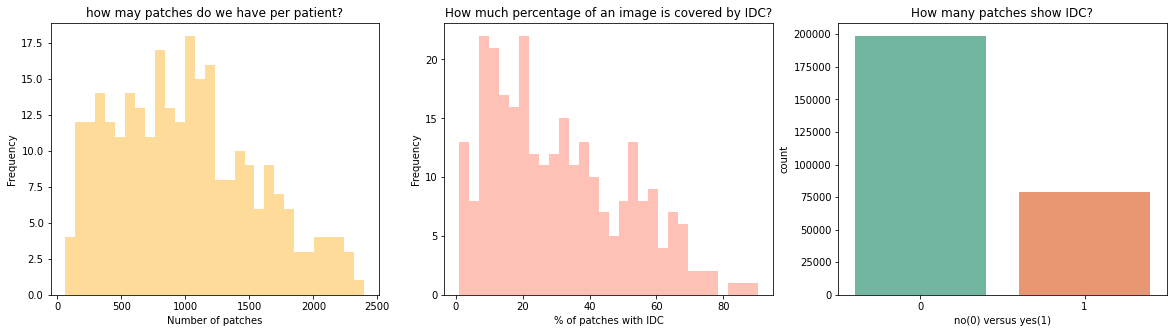

In [11]:
cancer_perc = data.groupby("patient_id").target.value_counts() / data.groupby("patient_id").target.size()
canxer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1, 3,figsize = (20,5))
sns.distplot(data.groupby('patient_id').size(), ax=ax[0], color='Orange', kde=False, bins=30)
ax[0].set_xlabel('Number of patches')
ax[0].set_ylabel('Frequency')
ax[0].set_title('how may patches do we have per patient?')
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
sns.countplot(data.target, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");


### Insights

* The numbe rof image patches per patient varie's a lot.

* Some patients have more than 80 % patches that show IDC! Consequently the tissue is full of cancer or only a part of the breast was covered by the tissue slice that is focused on the IDC cancer. 

* The classes of IDC versus no IDC are imbalanced.

In [12]:
# coverting target to int
data.target = data.target.astype(np.int)

C:\Users\Happy\AppData\Local\Temp\ipykernel_17904\3752586170.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.target = data.target.astype(np.int)


### Displaying Cnacer Tissue Samples

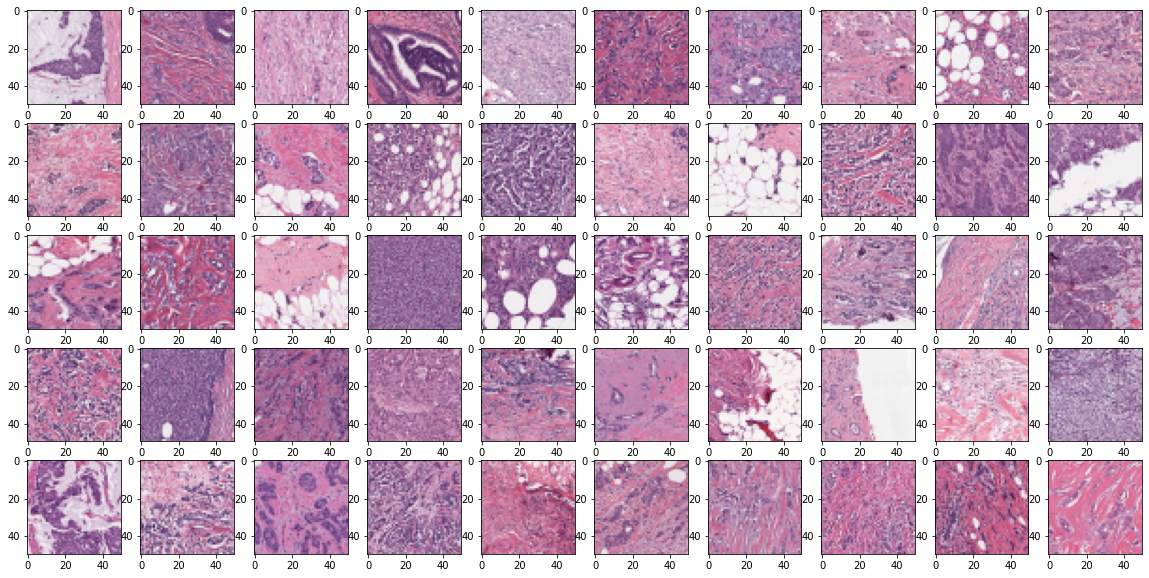

In [13]:
cancer_selection = np.random.choice(data[data.target == 1].index.values, size=50, replace=False)

fig, ax = plt.subplots(5, 10, figsize=(20, 10))

for n in range(5):
    for m in range(10):
        idx = cancer_selection[m + 10*n]
        image = imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)


### Displaying Non-Cnacer Tissue Samples

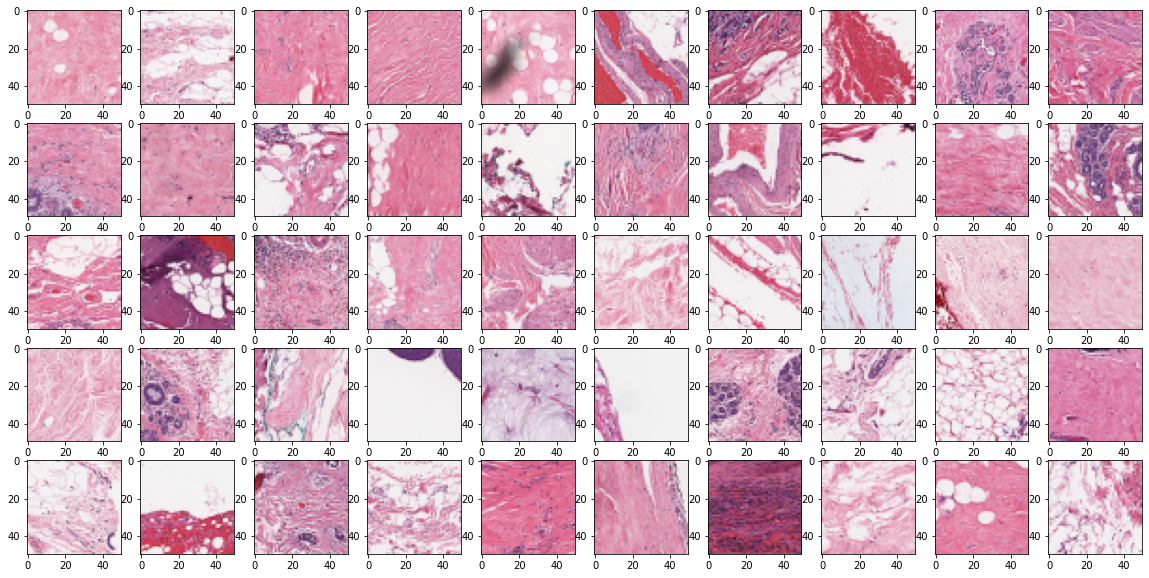

In [14]:
non_cancer_selection = np.random.choice(data[data.target == 0].index.values, size=50, replace=False)

fig, ax = plt.subplots(5, 10, figsize=(20, 10))

for n in range(5):
    for m in range(10):
        idx = non_cancer_selection[m + 10*n]
        image = imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

### Insights

* Cancer Tissur appears to be more viloet.

* But some non-caner tissue is also violet.


## Preparing the dataset

In [15]:
# Creating diresctory to store all images
all_images_dir = 'all_images_dir'

if os.path.isdir(all_images_dir):
    pass
else:
    os.mkdir(all_images_dir)
    


In [ ]:
# This code copies all images from their seperate folders into the same 
# folder called all_images_dir.

'''
The directory structure is like:
    patient_id:
                0
                1
'''

patient_list = folder

for patient in patient_list:
    
    path_0 = "../input/" + str(patient) + '/0'
    path_1 = "../input/" + str(patient) + '/1'
    
    # create list of all files in folder 0
    file_list_0 = listdir(path_0)
    
    #create a list of all files in folder 1
    file_list_1 = listdir(path_1)
    
    # moving the 0 class images to all_images_dir
    for fname in file_list_0:
        
        src = os.path.join(path_0, fname)
        dst = os.path.join(all_images_dir, fname)
        shutil.copyfile(src, dst)
        
    # moving the 1 class images to all_images_dir
    for fname in file_list_1:
        
        src = os.path.join(path_1, fname)
        dst = os.path.join(all_images_dir, fname)
        shutil.copyfile(src, dst)
        
    
        

In [15]:
# Total number of images
len(listdir(all_images_dir))

277524

### Creating dataframe of all images

In [16]:
image_list = os.listdir('all_images_dir')
df_data = pd.DataFrame(image_list, columns=['image_id'])

df_data.head()

,image_id
0,13403_idx5_x2101_y901_class1.png
1,9324_idx5_x1001_y201_class1.png
2,9325_idx5_x1751_y451_class0.png
3,12954_idx5_x2701_y401_class0.png
4,12905_idx5_x1151_y2001_class0.png


In [17]:
# Defining helper functions

def extract_patient_id(x):
    
    a = x.split('_')
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    
    a = x.split('_')
    b = a[4]
    target = b[5]
    
    return target

# creating new column named patient_id
df_data['patient_id'] = df_data['image_id'].apply(extract_patient_id)

#creating new column named target
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head(10)

    

,image_id,patient_id,target
0,13403_idx5_x2101_y901_class1.png,13403,1
1,9324_idx5_x1001_y201_class1.png,9324,1
2,9325_idx5_x1751_y451_class0.png,9325,0
3,12954_idx5_x2701_y401_class0.png,12954,0
4,12905_idx5_x1151_y2001_class0.png,12905,0
5,12910_idx5_x951_y701_class1.png,12910,1
6,10272_idx5_x1951_y2101_class0.png,10272,0
7,13689_idx5_x1501_y1951_class0.png,13689,0
8,14211_idx5_x1201_y451_class1.png,14211,1
9,15840_idx5_x2351_y551_class0.png,15840,0


In [18]:
# class distribution of the images

df_data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

### Balance the class distribution

* We can see that the class 1 images are higher in number that of class 0

* So to prevent this we balance the dataset

* We do this so that the Neural Network dose not lean on favouring only one class 

In [19]:
SAMPLE_SIZE = 78786

# take a sample of the majority class 0 (total = 198738)
df_0 = df_data[df_data['target'] == '0'].sample(SAMPLE_SIZE, random_state=101)
# take a sample of class 1 (total = 78786)
df_1 = df_data[df_data['target'] == '1'].sample(SAMPLE_SIZE, random_state=101)

# concat the two dataframes
df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)

# Check the new class distribution
df_data['target'].value_counts()

0    78786
1    78786
Name: target, dtype: int64

### Creating train and test sets

In [20]:
y = df_data['target']

df_train, df_val = train_test_split(df_data, test_size=0.10, random_state=101, stratify=y)

print(df_train.shape)
print(df_val.shape)

(141814, 3)
(15758, 3)


### Creating Directory Structure

In [21]:
# Creating new base directory
base_dir ='base_dir'
os.mkdir(base_dir)

# Creating train directory inside base directory
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# Creating validation directory inside base directory
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# create new folders inside train_dir
a_no_idc = os.path.join(train_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(train_dir, 'b_has_idc')
os.mkdir(b_has_idc)


# create new folders inside val_dir
a_no_idc = os.path.join(val_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(val_dir, 'b_has_idc')
os.mkdir(b_has_idc)




In [22]:
# check that the folders have been created
os.listdir('base_dir/train_dir')

['b_has_idc', 'a_no_idc']

In [23]:
# Set the id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [24]:
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

# Transfering the train images
for image in train_list:

    try: 
        fname = image
        target = df_data.loc[image, 'target']

        if target == '0':
            label = 'a_no_idc'
        if target == '1':
            label = 'b_has_idc'

        # source path to image
        src = os.path.join(all_images_dir, fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # move the image from the source to the destination
        shutil.move(src, dst)
    except: 
        continue

for image in val_list:

    try: 
        fname = image
        target = df_data.loc[image,'target']

        if target == '0':
            label = 'a_no_idc'
        if target == '1':
            label = 'b_has_idc'


        # source path to image
        src = os.path.join(all_images_dir, fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # move the image from the source to the destination
        shutil.move(src, dst)

    except:
        continue

        

In [25]:
# check how many val images we have in each folder
print(len(os.listdir('base_dir/train_dir/a_no_idc')))
print(len(os.listdir('base_dir/train_dir/b_has_idc')))

70907
70907


### Setting up image generators

In [26]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [27]:
IMAGE_SIZE = 50

In [28]:

datagen = ImageDataGenerator(rescale = 1.0 / 255,
                             rotation_range = 90,
                             zoom_range = 0.2,
                             horizontal_flip=True,
                             vertical_flip=True)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 141814 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.


In [29]:
# Building the model
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3


model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        3

### Training the model

In [30]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [31]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=50, verbose=1,
                   callbacks=callbacks_list)

try:
    model.save('/kaggle/working/model.h5')
except:
    pass

try:
    model.save('model.h5')
except:
    pass

Epoch 1/50
14182/14182 [==============================] - 340s 24ms/step - loss: 0.4692 - accuracy: 0.7887 - val_loss: 0.4049 - val_accuracy: 0.8269
Epoch 2/50
14182/14182 [==============================] - 332s 23ms/step - loss: 0.4087 - accuracy: 0.8226 - val_loss: 0.4081 - val_accuracy: 0.8180
Epoch 3/50
14182/14182 [==============================] - 326s 23ms/step - loss: 0.3867 - accuracy: 0.8353 - val_loss: 0.3728 - val_accuracy: 0.8473
Epoch 4/50
14182/14182 [==============================] - 327s 23ms/step - loss: 0.3739 - accuracy: 0.8415 - val_loss: 0.3684 - val_accuracy: 0.8455
Epoch 5/50
14182/14182 [==============================] - 324s 23ms/step - loss: 0.3647 - accuracy: 0.8464 - val_loss: 0.3470 - val_accuracy: 0.8511
Epoch 6/50
14182/14182 [==============================] - 323s 23ms/step - loss: 0.3591 - accuracy: 0.8493 - val_loss: 0.3482 - val_accuracy: 0.8533
Epoch 7/50
14182/14182 [==============================] - 325s 23ms/step - loss: 0.3543 - accuracy: 0.8524

In [35]:
model.save('model.h5')

### Evaluating the model

In [32]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

In [33]:
# Here the best epoch will be used.

model.load_weights('model.h5')

val_loss, val_acc = \
model.evaluate_generator(test_gen, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.32337668538093567
val_acc: 0.8747302889823914


### Plotting the training curves

<Figure size 432x288 with 0 Axes>

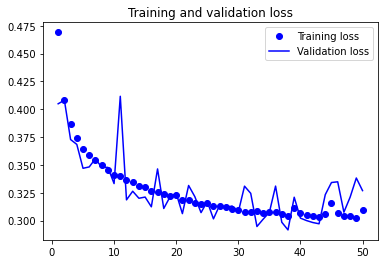

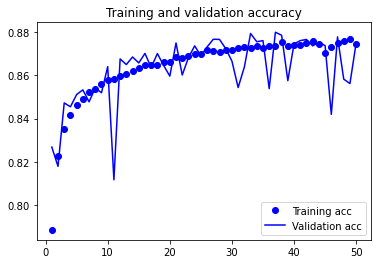

<Figure size 432x288 with 0 Axes>

In [38]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

### Make a prediction on the val set
We need these predictions to calculate the AUC score, print the Confusion Matrix and calculate the F1 score.

In [39]:
# make a prediction
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

15758/15758 [==============================] - 54s 3ms/step


In [41]:
predictions.shape

(15758, 2)

In [42]:
# This is how to check what index keras has internally assigned to each class. 
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

In [43]:
# Put the predictions into a dataframe.
# The columns need to be oredered to match the output of the previous cell

df_preds = pd.DataFrame(predictions, columns=['no_idc', 'has_idc'])

df_preds.head()

,no_idc,has_idc
0,0.690448,0.309552
1,0.685284,0.314716
2,0.293493,0.706507
3,0.332423,0.667577
4,0.829533,0.170467


In [45]:
# Get the true labels
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_idc']

### Calculating the AUC Score

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.9459758550448937

### Creating the confusion matrix

In [55]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
        

In [56]:
# Get the labels of the test images.

test_labels = test_gen.classes

In [57]:
test_labels.shape

(15758,)

In [58]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [59]:
# Print the label associated with each class
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

Confusion matrix, without normalization
[[6746 1133]
 [ 843 7036]]


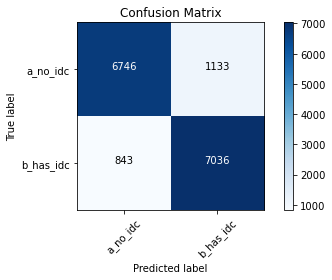

In [60]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['a_no_idc', 'b_has_idc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

### Creating a classfifcation Report

In [61]:
from sklearn.metrics import classification_report

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

    a_no_idc       0.89      0.86      0.87      7879
   b_has_idc       0.86      0.89      0.88      7879

    accuracy                           0.87     15758
   macro avg       0.88      0.87      0.87     15758
weighted avg       0.88      0.87      0.87     15758



**Recall** = Given a class, will the classifier be able to detect it?<br>
**Precision** = Given a class prediction from a classifier, how likely is it to be correct?<br>
**F1 Score** = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.

### Conclusion

* From the above report we can see that the model gives us admirable results.

* The model can be improved.

* The recall for each class should be ideally be above 0.90

* The present recall which the model produces is good enough.

* For use in the real world the recall can be further improved.

* This model can help pathologists detect cancer on tissue faster

* The manual examining of tissue slides would not be required